In [1]:
import concurrent.futures
import missingno as msno
import traceback
import pandas as pd
from GameFeatures import GameFeatures
from PreGameFeatures import PreGameFeatures
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [2]:
df = pd.read_csv('gamesDB.csv')

In [3]:
df.drop(columns='Unnamed: 0', inplace=True)

In [4]:
df.data = pd.to_datetime(df.data)

In [5]:
mask = df.data.dt.year > 2009

In [6]:
df[mask].head()

,data,time_casa,time_visitante,resultado,id_partida,link
1140,2010-05-08 19:30:00,Botafogo,Santos,3-3,gsm_id_919738,https://www.academiadasapostasbrasil.com/stats...
1141,2010-05-08 19:30:00,Atlético GO,Grêmio,0-0,gsm_id_919738,https://www.academiadasapostasbrasil.com/stats...
1142,2010-05-08 19:35:00,Palmeiras,Vitória,1-0,gsm_id_919738,https://www.academiadasapostasbrasil.com/stats...
1143,2010-05-09 17:00:00,Flamengo,São Paulo,1-1,gsm_id_919738,https://www.academiadasapostasbrasil.com/stats...
1144,2010-05-09 17:00:00,Atlético MG,Vasco,2-1,gsm_id_919738,https://www.academiadasapostasbrasil.com/stats...


In [7]:
links = df.link

In [8]:
# Descarta os 3 primeiros (380 x 3 = 1140) anos por ausencia de dados no site
links = links[1140:]

Executa as chamadas utilizando 6 Threads simultâneas. Cada Thread executa chamada pra duas páginas:
- GameFeatures ({url}/live)
- PreGameFeatures({url/prelive}

Após executar o processamento, combina alguns dicts e os adiciona numa lista chamada rows. Essa lista será usada pra criação de um DataFrame.

In [9]:
i = 0
games_len = len(links)
print(f'games_len: ${games_len}')
sfx='prelive'
rows = []
with concurrent.futures.ThreadPoolExecutor(max_workers=6) as executor:
    # Start the load operations and mark each future with its URL
    future_to_url = {executor.submit(GameFeatures, url): url for url in links}
    for i, future in enumerate(concurrent.futures.as_completed(future_to_url)):
        url = future_to_url[future]
        try:
            data = future.result()
            game = {'url_live': url, 'home_team': data[0], 'away_team': data[1], 
                     'home_team_score': data[2], 'away_team_score': data[3], 
                    'referee': data[4], 'stadium': data[5], 'city': data[6], 
                    'datetime': data[7], 'round': data[8] }
            events = {'eventList1st': data[9], 'eventList2nd': data[10]}
            lineup = {'lineupList': data[11], 'sublineupList': data[12]}
            
            pre_game = PreGameFeatures(url[:-4]+sfx, data[0], data[1])
            pre_game = pre_game.build()
            row = {**game, **events, **lineup, **data[13], **data[14], **pre_game }
            rows.append(row)
            print('Game number: '+str(i+1)+'/'+str(games_len))
        except Exception as exc:
            print('%r generated an exception' % (url))
            print(traceback.format_exc())

games_len: $3420
Game number: 1/3420
Game number: 2/3420
Game number: 3/3420
Game number: 4/3420
Game number: 5/3420
Game number: 6/3420
Game number: 7/3420
Game number: 8/3420
Game number: 9/3420
Game number: 10/3420
Game number: 11/3420
Game number: 12/3420
Game number: 13/3420
Game number: 14/3420
Game number: 15/3420
Game number: 16/3420
Game number: 17/3420
Game number: 18/3420
Game number: 19/3420
Game number: 20/3420
Game number: 21/3420
Game number: 22/3420
Game number: 23/3420
Game number: 24/3420
Game number: 25/3420
Game number: 26/3420
Game number: 27/3420
Game number: 28/3420
Game number: 29/3420
Game number: 30/3420
Game number: 31/3420
Game number: 32/3420
Game number: 33/3420
Game number: 34/3420
Game number: 35/3420
Game number: 36/3420
Game number: 37/3420
Game number: 38/3420
Game number: 39/3420
Game number: 40/3420
Game number: 41/3420
Game number: 42/3420
Game number: 43/3420
Game number: 44/3420
Game number: 45/3420
Game number: 46/3420
Game number: 47/3420
Game 

Game number: 331/3420
Game number: 332/3420
Game number: 333/3420
Game number: 334/3420
Game number: 335/3420
Game number: 336/3420
Game number: 337/3420
Game number: 338/3420
Game number: 339/3420
Game number: 340/3420
Game number: 341/3420
Game number: 342/3420
Game number: 343/3420
Game number: 344/3420
Game number: 345/3420
Game number: 346/3420
Game number: 347/3420
Game number: 348/3420
Game number: 349/3420
Game number: 350/3420
Game number: 351/3420
Game number: 352/3420
Game number: 353/3420
Game number: 354/3420
Game number: 355/3420
Game number: 356/3420
Game number: 357/3420
Game number: 358/3420
Game number: 359/3420
Game number: 360/3420
Game number: 361/3420
Game number: 362/3420
Game number: 363/3420
Game number: 364/3420
Game number: 365/3420
Game number: 366/3420
Game number: 367/3420
Game number: 368/3420
Game number: 369/3420
Game number: 370/3420
Game number: 371/3420
Game number: 372/3420
Game number: 373/3420
Game number: 374/3420
Game number: 375/3420
Game numbe

Game number: 704/3420
Game number: 705/3420
Game number: 706/3420
Game number: 707/3420
Game number: 708/3420
Game number: 709/3420
Game number: 710/3420
Game number: 711/3420
Game number: 712/3420
Game number: 713/3420
Game number: 714/3420
Game number: 715/3420
Game number: 716/3420
Game number: 717/3420
Game number: 718/3420
Game number: 719/3420
Game number: 720/3420
Game number: 721/3420
Game number: 722/3420
Game number: 723/3420
Game number: 724/3420
Game number: 725/3420
Game number: 726/3420
Game number: 727/3420
Game number: 728/3420
Game number: 729/3420
Game number: 730/3420
Game number: 731/3420
Game number: 732/3420
Game number: 733/3420
Game number: 734/3420
Game number: 735/3420
Game number: 736/3420
Game number: 737/3420
Game number: 738/3420
Game number: 739/3420
Game number: 740/3420
Game number: 741/3420
Game number: 742/3420
Game number: 743/3420
Game number: 744/3420
Game number: 745/3420
Game number: 746/3420
Game number: 747/3420
Game number: 748/3420
Game numbe

Game number: 1074/3420
Game number: 1075/3420
Game number: 1076/3420
Game number: 1077/3420
Game number: 1078/3420
Game number: 1079/3420
Game number: 1080/3420
Game number: 1081/3420
Game number: 1082/3420
Game number: 1083/3420
Game number: 1084/3420
Game number: 1085/3420
Game number: 1086/3420
Game number: 1087/3420
Game number: 1088/3420
Game number: 1089/3420
Game number: 1090/3420
Game number: 1091/3420
Game number: 1092/3420
Game number: 1093/3420
Game number: 1094/3420
Game number: 1095/3420
Game number: 1096/3420
Game number: 1097/3420
Game number: 1098/3420
Game number: 1099/3420
Game number: 1100/3420
Game number: 1101/3420
Game number: 1102/3420
Game number: 1103/3420
Game number: 1104/3420
Game number: 1105/3420
Game number: 1106/3420
Game number: 1107/3420
Game number: 1108/3420
Game number: 1109/3420
Game number: 1110/3420
Game number: 1111/3420
Game number: 1112/3420
Game number: 1113/3420
Game number: 1114/3420
Game number: 1115/3420
Game number: 1116/3420
Game number

Game number: 1431/3420
Game number: 1432/3420
Game number: 1433/3420
Game number: 1434/3420
Game number: 1435/3420
Game number: 1436/3420
Game number: 1437/3420
Game number: 1438/3420
Game number: 1439/3420
Game number: 1440/3420
Game number: 1441/3420
Game number: 1442/3420
Game number: 1443/3420
Game number: 1444/3420
Game number: 1445/3420
Game number: 1446/3420
Game number: 1447/3420
Game number: 1448/3420
Game number: 1449/3420
Game number: 1450/3420
Game number: 1451/3420
Game number: 1452/3420
Game number: 1453/3420
Game number: 1454/3420
Game number: 1455/3420
Game number: 1456/3420
Game number: 1457/3420
Game number: 1458/3420
Game number: 1459/3420
Game number: 1460/3420
Game number: 1461/3420
Game number: 1462/3420
Game number: 1463/3420
Game number: 1464/3420
Game number: 1465/3420
Game number: 1466/3420
Game number: 1467/3420
Game number: 1468/3420
Game number: 1469/3420
Game number: 1470/3420
Game number: 1471/3420
Game number: 1472/3420
Game number: 1473/3420
Game number

Game number: 1627/3420
Game number: 1628/3420
Game number: 1629/3420
Game number: 1630/3420
Game number: 1631/3420
Game number: 1632/3420
Game number: 1633/3420
Game number: 1634/3420
Game number: 1635/3420
Game number: 1636/3420
Game number: 1637/3420
Game number: 1638/3420
Game number: 1639/3420
Game number: 1640/3420
Game number: 1641/3420
Game number: 1642/3420
Game number: 1643/3420
Game number: 1644/3420
Game number: 1645/3420
Game number: 1646/3420
Game number: 1647/3420
Game number: 1648/3420
Game number: 1649/3420
Game number: 1650/3420
Game number: 1651/3420
Game number: 1652/3420
Game number: 1653/3420
Game number: 1654/3420
Game number: 1655/3420
Game number: 1656/3420
Game number: 1657/3420
Game number: 1658/3420
Game number: 1659/3420
Game number: 1660/3420
Game number: 1661/3420
Game number: 1662/3420
Game number: 1663/3420
Game number: 1664/3420
Game number: 1665/3420
Game number: 1666/3420
Game number: 1667/3420
Game number: 1668/3420
Game number: 1669/3420
Game number

Game number: 1984/3420
Game number: 1985/3420
Game number: 1986/3420
Game number: 1987/3420
Game number: 1988/3420
Game number: 1989/3420
Game number: 1990/3420
Game number: 1991/3420
Game number: 1992/3420
Game number: 1993/3420
Game number: 1994/3420
Game number: 1995/3420
Game number: 1996/3420
Game number: 1997/3420
Game number: 1998/3420
Game number: 1999/3420
Game number: 2000/3420
Game number: 2001/3420
Game number: 2002/3420
Game number: 2003/3420
Game number: 2004/3420
Game number: 2005/3420
Game number: 2006/3420
Game number: 2007/3420
Game number: 2008/3420
Game number: 2009/3420
Game number: 2010/3420
Game number: 2011/3420
Game number: 2012/3420
Game number: 2013/3420
Game number: 2014/3420
Game number: 2015/3420
Game number: 2016/3420
Game number: 2017/3420
Game number: 2018/3420
Game number: 2019/3420
Game number: 2020/3420
Game number: 2021/3420
Game number: 2022/3420
Game number: 2023/3420
Game number: 2024/3420
Game number: 2025/3420
Game number: 2026/3420
Game number

Game number: 2117/3420
Game number: 2118/3420
Game number: 2119/3420
Game number: 2120/3420
Game number: 2121/3420
Game number: 2122/3420
Game number: 2123/3420
Game number: 2124/3420
Game number: 2125/3420
Game number: 2126/3420
Game number: 2127/3420
Game number: 2128/3420
Game number: 2129/3420
Game number: 2130/3420
Game number: 2131/3420
Game number: 2132/3420
Game number: 2133/3420
Game number: 2134/3420
Game number: 2135/3420
Game number: 2136/3420
Game number: 2137/3420
Game number: 2138/3420
Game number: 2139/3420
Game number: 2140/3420
Game number: 2141/3420
Game number: 2142/3420
Game number: 2143/3420
Game number: 2144/3420
Game number: 2145/3420
Game number: 2146/3420
Game number: 2147/3420
Game number: 2148/3420
Game number: 2149/3420
Game number: 2150/3420
Game number: 2151/3420
Game number: 2152/3420
Game number: 2153/3420
Game number: 2154/3420
Game number: 2155/3420
Game number: 2156/3420
Game number: 2157/3420
Game number: 2158/3420
Game number: 2159/3420
Game number

Game number: 2474/3420
Game number: 2475/3420
Game number: 2476/3420
Game number: 2477/3420
Game number: 2478/3420
Game number: 2479/3420
Game number: 2480/3420
Game number: 2481/3420
Game number: 2482/3420
Game number: 2483/3420
Game number: 2484/3420
Game number: 2485/3420
Game number: 2486/3420
Game number: 2487/3420
Game number: 2488/3420
Game number: 2489/3420
Game number: 2490/3420
Game number: 2491/3420
Game number: 2492/3420
Game number: 2493/3420
Game number: 2494/3420
Game number: 2495/3420
Game number: 2496/3420
Game number: 2497/3420
Game number: 2498/3420
Game number: 2499/3420
Game number: 2500/3420
Game number: 2501/3420
Game number: 2502/3420
Game number: 2503/3420
Game number: 2504/3420
Game number: 2505/3420
Game number: 2506/3420
Game number: 2507/3420
Game number: 2508/3420
Game number: 2509/3420
Game number: 2510/3420
Game number: 2511/3420
Game number: 2512/3420
Game number: 2513/3420
Game number: 2514/3420
Game number: 2515/3420
Game number: 2516/3420
Game number

'https://www.academiadasapostasbrasil.com/stats/match/brasil-stats/brasileirao-serie-a/internacional/figueirense/2218176/1/live' generated an exception
Traceback (most recent call last):
  File "<ipython-input-9-66c2acf18b29>", line 21, in <module>
    pre_game = pre_game.build()
  File "/Users/silvio/dev/projetos/digital_house/brazilian_soccer_prediction/scrapping/PreGameFeatures.py", line 19, in build
    classification = {'ht_current_classification': self.team_classification(self.content_parsed, self.home_team), 'at_current_classification' : self.team_classification(self.content_parsed, self.away_team)}
  File "/Users/silvio/dev/projetos/digital_house/brazilian_soccer_prediction/scrapping/PreGameFeatures.py", line 34, in team_classification
    content_position = doc.find('table', class_='results competition-rounds competition-half-padding').find('a', string=regex_team).find_parent('tr').td.contents[0].strip()
AttributeError: 'NoneType' object has no attribute 'find'

Game number: 2

Game number: 2713/3420
Game number: 2714/3420
Game number: 2715/3420
Game number: 2716/3420
Game number: 2717/3420
Game number: 2718/3420
Game number: 2719/3420
Game number: 2720/3420
Game number: 2721/3420
Game number: 2722/3420
Game number: 2723/3420
Game number: 2724/3420
Game number: 2725/3420
Game number: 2726/3420
Game number: 2727/3420
Game number: 2728/3420
Game number: 2729/3420
Game number: 2730/3420
Game number: 2731/3420
Game number: 2732/3420
Game number: 2733/3420
Game number: 2734/3420
Game number: 2735/3420
Game number: 2736/3420
Game number: 2737/3420
Game number: 2738/3420
Game number: 2739/3420
Game number: 2740/3420
Game number: 2741/3420
Game number: 2742/3420
Game number: 2743/3420
Game number: 2744/3420
Game number: 2745/3420
Game number: 2746/3420
Game number: 2747/3420
Game number: 2748/3420
Game number: 2749/3420
Game number: 2750/3420
Game number: 2751/3420
Game number: 2752/3420
Game number: 2753/3420
Game number: 2754/3420
Game number: 2755/3420
Game number

Game number: 3070/3420
Game number: 3071/3420
Game number: 3072/3420
Game number: 3073/3420
Game number: 3074/3420
Game number: 3075/3420
Game number: 3076/3420
Game number: 3077/3420
Game number: 3078/3420
Game number: 3079/3420
Game number: 3080/3420
Game number: 3081/3420
Game number: 3082/3420
Game number: 3083/3420
Game number: 3084/3420
Game number: 3085/3420
Game number: 3086/3420
Game number: 3087/3420
Game number: 3088/3420
Game number: 3089/3420
Game number: 3090/3420
Game number: 3091/3420
Game number: 3092/3420
Game number: 3093/3420
Game number: 3094/3420
Game number: 3095/3420
Game number: 3096/3420
Game number: 3097/3420
Game number: 3098/3420
Game number: 3099/3420
Game number: 3100/3420
Game number: 3101/3420
Game number: 3102/3420
Game number: 3103/3420
Game number: 3104/3420
Game number: 3105/3420
Game number: 3106/3420
Game number: 3107/3420
Game number: 3108/3420
Game number: 3109/3420
Game number: 3110/3420
Game number: 3111/3420
Game number: 3112/3420
Game number

Game number: 3224/3420
Game number: 3225/3420
Game number: 3226/3420
Game number: 3227/3420
Game number: 3228/3420
Game number: 3229/3420
'https://www.academiadasapostasbrasil.com/stats/match/brasil-stats/brasileirao-serie-a/gremio/cruzeiro/2729436/1/live' generated an exception
Traceback (most recent call last):
  File "/Users/silvio/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/urllib3/connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "/Users/silvio/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/urllib3/connectionpool.py", line 384, in _make_request
    six.raise_from(e, None)
  File "<string>", line 2, in raise_from
  File "/Users/silvio/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/urllib3/connectionpool.py", line 380, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/silvio/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/s

Game number: 3338/3420
Game number: 3339/3420
Game number: 3340/3420
Game number: 3341/3420
Game number: 3342/3420
Game number: 3343/3420
Game number: 3344/3420
Game number: 3345/3420
Game number: 3346/3420
Game number: 3347/3420
Game number: 3348/3420
Game number: 3349/3420
Game number: 3350/3420
Game number: 3351/3420
Game number: 3352/3420
Game number: 3353/3420
Game number: 3354/3420
Game number: 3355/3420
Game number: 3356/3420
Game number: 3357/3420
Game number: 3358/3420
Game number: 3359/3420
Game number: 3360/3420
Game number: 3361/3420
Game number: 3362/3420
Game number: 3363/3420
Game number: 3364/3420
Game number: 3365/3420
Game number: 3366/3420
Game number: 3367/3420
Game number: 3368/3420
Game number: 3369/3420
Game number: 3370/3420
Game number: 3371/3420
Game number: 3372/3420
Game number: 3373/3420
Game number: 3374/3420
Game number: 3375/3420
Game number: 3376/3420
Game number: 3377/3420
Game number: 3378/3420
Game number: 3379/3420
Game number: 3380/3420
Game number

In [10]:
df_csv = pd.DataFrame(rows)

In [11]:
df_csv.columns

Index(['a_Ataques', 'a_Ataques perigosos', 'a_Cartões amarelos',
       'a_Cartões vermelhos', 'a_Chutes a gol', 'a_Chutes ao ferro',
       'a_Chutes bloqueados', 'a_Chutes fora', 'a_Escanteios', 'a_Faltas',
       'a_Gols', 'a_Impedimentos', 'a_Laterais', 'a_Posse de bola',
       'a_Pênaltis', 'a_Segundo cartão amarelo', 'a_Substituições',
       'a_Tiros de meta', 'a_Tiros-livres', 'at_current_classification',
       'at_current_draws_away', 'at_current_draws_global',
       'at_current_draws_home', 'at_current_loss_away',
       'at_current_loss_global', 'at_current_loss_home',
       'at_current_wins_away', 'at_current_wins_global',
       'at_current_wins_home', 'at_games_without_draw_away',
       'at_games_without_draw_global', 'at_games_without_draw_home',
       'at_games_without_lose_away', 'at_games_without_lose_global',
       'at_games_without_lose_home', 'at_games_without_win_away',
       'at_games_without_win_global', 'at_games_without_win_home', 'away_team',
       '

In [12]:
#Lista todas as colunas do dataset
pd.set_option('display.max_columns', None) 
df_csv.head()

,a_Ataques,a_Ataques perigosos,a_Cartões amarelos,a_Cartões vermelhos,a_Chutes a gol,a_Chutes ao ferro,a_Chutes bloqueados,a_Chutes fora,a_Escanteios,a_Faltas,a_Gols,a_Impedimentos,a_Laterais,a_Posse de bola,a_Pênaltis,a_Segundo cartão amarelo,a_Substituições,a_Tiros de meta,a_Tiros-livres,at_current_classification,at_current_draws_away,at_current_draws_global,at_current_draws_home,at_current_loss_away,at_current_loss_global,at_current_loss_home,at_current_wins_away,at_current_wins_global,at_current_wins_home,at_games_without_draw_away,at_games_without_draw_global,at_games_without_draw_home,at_games_without_lose_away,at_games_without_lose_global,at_games_without_lose_home,at_games_without_win_away,at_games_without_win_global,at_games_without_win_home,away_team,away_team_score,city,datetime,eventList1st,eventList2nd,h_Ataques,h_Ataques perigosos,h_Cartões amarelos,h_Cartões vermelhos,h_Chutes a gol,h_Chutes ao ferro,h_Chutes bloqueados,h_Chutes fora,h_Escanteios,h_Faltas,h_Gols,h_Impedimentos,h_Laterais,h_Posse de bola,h_Pênaltis,h_Segundo cartão amarelo,h_Substituições,h_Tiros de meta,h_Tiros-livres,home_team,home_team_score,ht_current_classification,ht_current_draws_away,ht_current_draws_global,ht_current_draws_home,ht_current_loss_away,ht_current_loss_global,ht_current_loss_home,ht_current_wins_away,ht_current_wins_global,ht_current_wins_home,ht_games_without_draw_away,ht_games_without_draw_global,ht_games_without_draw_home,ht_games_without_lose_away,ht_games_without_lose_global,ht_games_without_lose_home,ht_games_without_win_away,ht_games_without_win_global,ht_games_without_win_home,lineupList,referee,round,stadium,sublineupList,url_live
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,Santos,3,Rio de Janeiro,08 maio 2010 - 19:30,"[{'time': '8'', 'kind': 'Goal', 'hometeam': Tr...","[{'time': '46'', 'kind': 'Substitute in', 'hom...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Botafogo,3,6,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,"([(person-4802, Jefferson), (person-16989, Ale...",Leonardo Gaciba Da Silva,1,Estádio Nilton Santos,"([(person-32310, Renan), (person-32998, Marcel...",https://www.academiadasapostasbrasil.com/stats...
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,Vitória,0,"São Paulo, São Paulo",08 maio 2010 - 19:35,"[{'time': '21'', 'kind': 'Yellow card', 'homet...","[{'time': '52'', 'kind': 'Yellow card', 'homet...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Palmeiras,1,10,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,"([(person-9277, Marcos), (person-9164, Vitor),...",Pericles Bassols Pegado Cortez,1,Estádio Palestra Itália,"([(person-65191, Deola), (person-32928, Mauríc...",https://www.academiadasapostasbrasil.com/stats...
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,Vasco,1,"Belo Horizonte, Minas Gerais",09 maio 2010 - 17:00,"[{'time': '9'', 'kind': 'Goal', 'hometeam': Tr...","[{'time': '53'', 'kind': 'Yellow card', 'homet...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Atlético MG,2,13,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,"([(person-32707, Aranha), (person-8908, Coelho...",Elmo Alves Resende Cunha,1,Estádio Governador Magalhães Pinto,"([(person-10377, F. Carini), (person-23726, Pe...",https://www.academiadasapostasbrasil.com/stats...
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,Cruzeiro,2,"Porto Alegre, Rio Grande do Sul",09 maio 2010 - 17:00,"[{'time': '4'', 'kind': 'Penalty goal', 'homet...","[{'time': '46'', 'kind': 'Substitute in', 'hom...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Internacional,1,7,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,"([(person-9781, Lauro), (person-68732, Arilton...",Wilson Luiz Seneme,1,Estádio Jo

In [13]:
df_csv.to_csv('last_crawler.csv')

In [5]:
df = pd.read_csv('crawler.csv')

In [ ]:
!pip install missingno

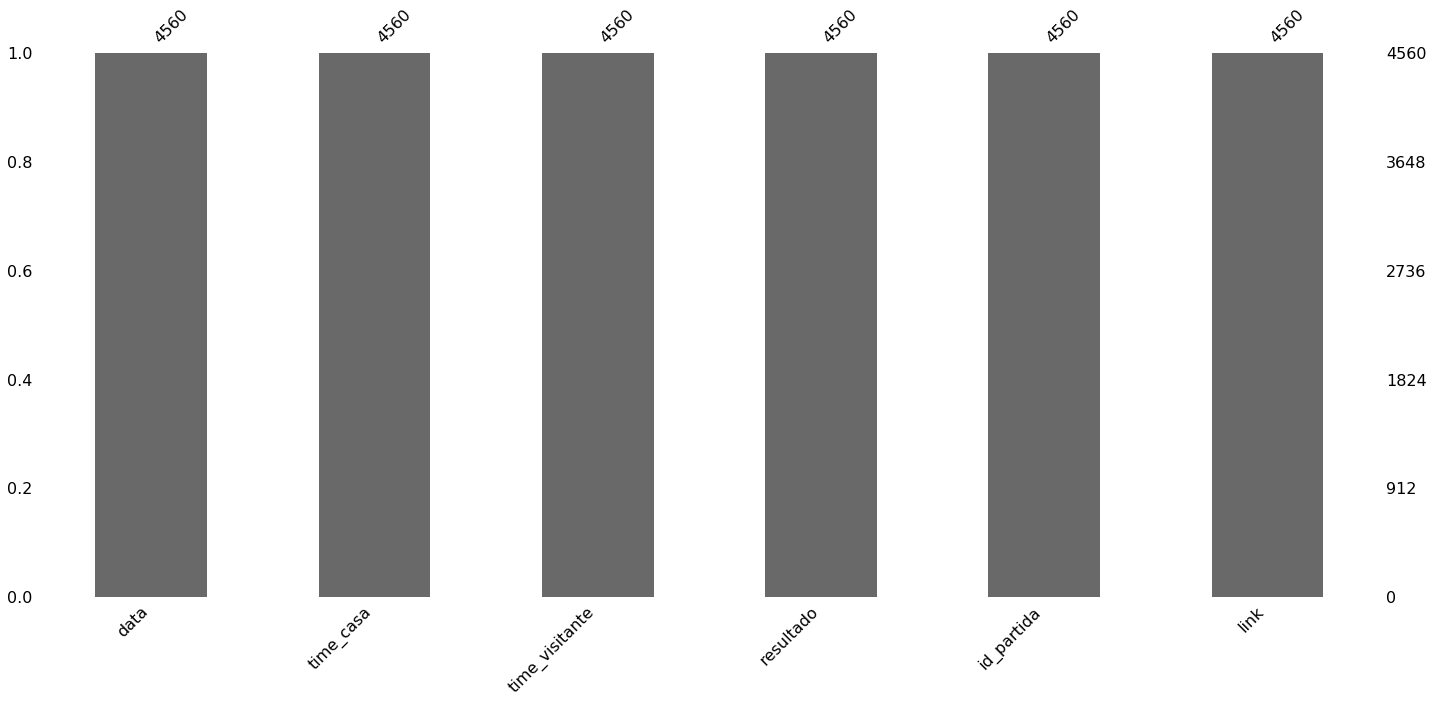

In [14]:
msno.bar(df)

In [ ]:
df.columns

In [ ]:
df.shape

In [ ]:
df.shots_woodwork.count()

In [ ]:
#df.dtypes
#tempo = df.datetime.to_dastype('datetime64[ns]')
#08 maio 2010 - 19:30
#dir(df)
import locale
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')
tempo = pd.to_datetime(df['datetime'], format='%d %B %Y - %H:%M')


In [ ]:
df.shots_target.count()

In [ ]:
print(df.shots_on_target.count()

In [ ]:
df.shots_on_target.value_counts(dropna=False)

In [6]:
filtro = (df.possession.isnull())
df[filtro][['datetime', 'home_team', 'away_team','round', 'possession']]


,datetime,home_team,away_team,round,possession
0,08 maio 2010 - 19:30,Botafogo,Santos,1,NaN
1,08 maio 2010 - 19:30,Atlético GO,Grêmio,1,NaN
2,09 maio 2010 - 17:00,Atlético MG,Vasco,1,NaN
3,09 maio 2010 - 17:00,Internacional,Cruzeiro,1,NaN
4,08 maio 2010 - 19:35,Palmeiras,Vitória,1,NaN
5,09 maio 2010 - 17:00,Flamengo,São Paulo,1,NaN
6,09 maio 2010 - 17:00,Corinthians,Atlético PR,1,NaN
7,09 maio 2010 - 19:30,Ceará,Fluminense,1,NaN
8,09 maio 2010 - 19:30,Guarani,Goiás,1,NaN
9,15 maio 2010 - 19:30,Fluminense,Atlético GO,2,NaN


In [ ]:
import ast
lineup = ast.literal_eval(df.lineupList[0])
print(type(lista))
print(f'TIPO: {type(lineup[0])} \t  TITULARES: {lineup[0]}')
print(f'TIPO: {type(lineup[0])} \t RESERVAS: {lineup[1]}')

In [5]:
url = 'https://www.academiadasapostasbrasil.com/stats/match/brasil-stats/brasileirao-serie-a/palmeiras/portuguesa/1269317/1/live'
url2= 'https://www.academiadasapostasbrasil.com/stats/match/brasil-stats/brasileirao-serie-a/figueirense/nautico/1269322/1/live'
url3 = 'https://www.academiadasapostasbrasil.com/stats/match/brasil-stats/brasileirao-serie-a/botafogo/santos/919738/1/live'
data = GameFeatures(url)
print(data[13])
print(data[14])

{'h_Posse de bola': '53%', 'h_Chutes a gol': '16', 'h_Chutes fora': '4', 'h_Impedimentos': '0', 'h_Faltas': '16', 'h_Escanteios': '9'}
{'a_Posse de bola': '47%', 'a_Chutes a gol': '9', 'a_Chutes fora': '9', 'a_Impedimentos': '2', 'a_Faltas': '20', 'a_Escanteios': '11'}


In [6]:
lista = []
dict1_jogo_h = {'h_Posse de bola': '53%', 'h_Chutes a gol': '16', 'h_Chutes fora': '4', 'h_Impedimentos': '0', 'h_Faltas': '16', 'h_Escanteios': '9'}
dict1_jogo_a = {'a_Posse de bola': '47%', 'a_Chutes a gol': '9', 'a_Chutes fora': '9', 'a_Impedimentos': '2', 'a_Faltas': '20', 'a_Escanteios': '11'}

dict2_jogo_h = {}
dict2_jogo_a = {}


dict_jogo1 = {**dict1_jogo_h, **dict1_jogo_a}
dict_jogo2 = {**dict2_jogo_h, **dict2_jogo_a}
lista.append(dict_jogo1)
lista.append(dict_jogo2)



In [7]:
dfteste = pd.DataFrame(lista)

In [8]:
#Valores NaN serao dos jogos que nao possuem dados
dfteste.head()

,a_Chutes a gol,a_Chutes fora,a_Escanteios,a_Faltas,a_Impedimentos,a_Posse de bola,h_Chutes a gol,h_Chutes fora,h_Escanteios,h_Faltas,h_Impedimentos,h_Posse de bola
0,9,9,11,20,2,47%,16,4,9,16,0,53%
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
lista_errors = ['https://www.academiadasapostasbrasil.com/stats/match/brasil-stats/brasileirao-serie-a/vasco/gremio-barueri/920060/1/live',
'https://www.academiadasapostasbrasil.com/stats/match/brasil-stats/brasileirao-serie-a/goias/sport/1645193/1/live',
'https://www.academiadasapostasbrasil.com/stats/match/brasil-stats/brasileirao-serie-a/goias/palmeiras/2015402/1/live',
'https://www.academiadasapostasbrasil.com/stats/match/brasil-stats/brasileirao-serie-a/fluminense/sport/2218172/1/live',
'https://www.academiadasapostasbrasil.com/stats/match/brasil-stats/brasileirao-serie-a/sao-paulo/flamengo/2218173/1/live',
'https://www.academiadasapostasbrasil.com/stats/match/brasil-stats/brasileirao-serie-a/botafogo/corinthians/2218171/1/live',
'https://www.academiadasapostasbrasil.com/stats/match/brasil-stats/brasileirao-serie-a/santos/atletico-pr/2218174/1/live',
'https://www.academiadasapostasbrasil.com/stats/match/brasil-stats/brasileirao-serie-a/chapecoense/vitoria/2218178/1/live',
'https://www.academiadasapostasbrasil.com/stats/match/brasil-stats/brasileirao-serie-a/ponte-preta/atletico-mg/2218179/1/live',
'https://www.academiadasapostasbrasil.com/stats/match/brasil-stats/brasileirao-serie-a/cruzeiro/gremio/2218175/1/live',
'https://www.academiadasapostasbrasil.com/stats/match/brasil-stats/brasileirao-serie-a/internacional/figueirense/2218176/1/live',
'https://www.academiadasapostasbrasil.com/stats/match/brasil-stats/brasileirao-serie-a/chapecoense/atletico-mg/2218278/1/live',
'https://www.academiadasapostasbrasil.com/stats/match/brasil-stats/brasileirao-serie-a/ponte-preta/chapecoense/2419024/1/live',
'https://www.academiadasapostasbrasil.com/stats/match/brasil-stats/brasileirao-serie-a/america-mineiro/fluminense/2729419/1/live',
'https://www.academiadasapostasbrasil.com/stats/match/brasil-stats/brasileirao-serie-a/gremio/cruzeiro/2729436/1/live']


In [17]:
#i = 0
games_len = len(links)
print(f'games_len: ${games_len}')
sfx='prelive'
rows_errors = []
with concurrent.futures.ThreadPoolExecutor(max_workers=6) as executor:
    # Start the load operations and mark each future with its URL
    future_to_url = {executor.submit(GameFeatures, url): url for url in lista_errors}
    for i, future in enumerate(concurrent.futures.as_completed(future_to_url)):
        url = future_to_url[future]
        try:
            data = future.result()
            game = {'url_live': url, 'home_team': data[0], 'away_team': data[1], 
                     'home_team_score': data[2], 'away_team_score': data[3], 
                    'referee': data[4], 'stadium': data[5], 'city': data[6], 
                    'datetime': data[7], 'round': data[8] }
            events = {'eventList1st': data[9], 'eventList2nd': data[10]}
            lineup = {'lineupList': data[11], 'sublineupList': data[12]}
            
            pre_game = PreGameFeatures(url[:-4]+sfx, data[0], data[1])
            pre_game = pre_game.build()
            row_error = {**game, **events, **lineup, **data[13], **data[14], **pre_game }
            rows_errors.append(row_error)
            print('Game number: '+str(i+1)+'/'+str(games_len))
        except Exception as exc:
            print('%r generated an exception' % (url))
            print(traceback.format_exc())

games_len: $3420
Game number: 1/3420
'https://www.academiadasapostasbrasil.com/stats/match/brasil-stats/brasileirao-serie-a/botafogo/corinthians/2218171/1/live' generated an exception
Traceback (most recent call last):
  File "<ipython-input-17-8a9b48c982fa>", line 21, in <module>
    pre_game = pre_game.build()
  File "/Users/silvio/dev/projetos/digital_house/brazilian_soccer_prediction/scrapping/PreGameFeatures.py", line 19, in build
    classification = {'ht_current_classification': self.team_classification(self.content_parsed, self.home_team), 'at_current_classification' : self.team_classification(self.content_parsed, self.away_team)}
  File "/Users/silvio/dev/projetos/digital_house/brazilian_soccer_prediction/scrapping/PreGameFeatures.py", line 34, in team_classification
    content_position = doc.find('table', class_='results competition-rounds competition-half-padding').find('a', string=regex_team).find_parent('tr').td.contents[0].strip()
AttributeError: 'NoneType' object has no

Game number: 13/3420
Game number: 14/3420
Game number: 15/3420


In [19]:
print(len(rows_errors))
rows.extend(rows_errors)

#df_final = pd.DataFrame(rows)

6


In [20]:
print(len(rows))

3411


In [21]:
df_final = pd.DataFrame(rows)
df_final.to_csv('last_crawler.csv')